In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator,img_to_array

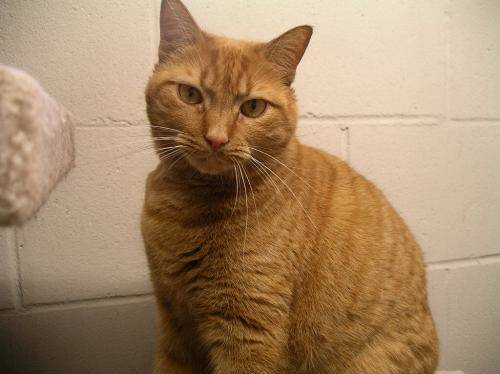

In [3]:
imgData = load_img( 'image/cat/cat1.jpg')
imgData

In [4]:
print( type(imgData))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
# ImageDataGenerator( rescale=1./255, horizontal_flip=True, 
#                    zoom_range=0.2,width_shift_range=0.1, 
#                 height_shift_range=0.1, rotation_range=30, fill_mode='nearest')

In [ ]:
dataGen= ImageDataGenerator( rescale=1./255)
# trainGen = dataGen.flow_from_directory( './image' , target_size=(98,98) ,batch_size=32)
trainGen = dataGen.flow_from_directory( './image' , target_size=(98,98))

Found 20 images belonging to 2 classes.


In [8]:
x_train, y_train = next( trainGen )

In [10]:
x_train.shape

(20, 98, 98, 3)

In [11]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
trainGen.class_indices

{'cat': 0, 'dog': 1}

In [14]:
model = Sequential()
model.add( Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(98,98,3),
                  activation='relu', padding='same' ) )
model.add( Conv2D(16, kernel_size=(3,3), activation='relu') )
model.add( MaxPool2D(pool_size=(2,2) ) )
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=2, activation='softmax'))
model.compile( loss='categorical_crossentropy', 
              optimizer=Adam(0.01) ,metrics=['acc'])
model.fit( trainGen ,epochs=100)
# model.fit( x_train, y_train, epochs=10)

Epoch 1/100


c:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 0.3500 - loss: 0.7012
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.5000 - loss: 7.9223
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.5000 - loss: 6.2428
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.5000 - loss: 0.9489
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - acc: 1.0000 - loss: 0.6396
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - acc: 0.5000 - loss: 2.5726
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - acc: 0.5000 - loss: 1.5704
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.5500 - loss: 0.6769
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - acc: 0.5000 - loss: 0.6579
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0.5000 - loss: 0.6531
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - acc: 0.9000 - loss: 0.4978
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.9000 - loss: 0.4572
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - acc: 0.9

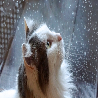

In [15]:
testImg = load_img( 'cat.jpg', target_size=(98,98))
testImg

In [17]:
imgArr = img_to_array( testImg )/255
imgArr.shape

(98, 98, 3)

In [19]:
model.predict( imgArr.reshape(1,98,98,3) ).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([0])

In [ ]:
model.save('catdog.keras')# 'catdog.h5'